In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['tables_1968_2018.csv']


In [2]:
data_path = '../input/tables_1968_2018.csv' # Path to data file
data = pd.read_csv(data_path) 
data.head(15)

,season,name,pos,team,p,w,d,l,f,a,gd,points
0,2017/2018,Premier League 2017-2018,1,Manchester City,38,32,4,2,106,27,79,100
1,2017/2018,Premier League 2017-2018,2,Manchester United,38,25,6,7,68,28,40,81
2,2017/2018,Premier League 2017-2018,3,Tottenham Hotspur,38,23,8,7,74,36,38,77
3,2017/2018,Premier League 2017-2018,4,Liverpool,38,21,12,5,84,38,46,75
4,2017/2018,Premier League 2017-2018,5,Chelsea,38,21,7,10,62,38,24,70
5,2017/2018,Premier League 2017-2018,6,Arsenal,38,19,6,13,74,51,23,63
6,2017/2018,Premier League 2017-2018,7,Burnley,38,14,12,12,36,39,-3,54
7,2017/2018,Premier League 2017-2018,8,Everton,38,13,10,15,44,58,-14,49
8,2017/2018,Premier League 2017-2018,9,Leicester City,38,12,11,15,56,60,-4,47
9,2017/2018,Premier League 2017-2018,10,Newcastle United,38,12,8,18,39,47,-8,44


In [3]:
data.columns

Index(['season', 'name', 'pos', 'team', 'p', 'w', 'd', 'l', 'f', 'a', 'gd',
       'points'],
      dtype='object')

In [4]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number): #and column != 'AwayTeam':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [5]:

label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(season) = ['1967/1968' '1968/1969' '1969/1970' '1970/1971' '1971/1972' '1972/1973'
 '1973/1974' '1974/1975' '1975/1976' '1976/1977' '1977/1978' '1978/1979'
 '1979/1980' '1980/1981' '1981/1982' '1982/1983' '1983/1984' '1984/1985'
 '1985/1986' '1986/1987' '1987/1988' '1988/1989' '1989/1990' '1990/1991'
 '1991/1992' '1992/1993' '1993/1994' '1994/1995' '1995/1996' '1996/1997'
 '1997/1998' '1998/1999' '1999/2000' '2000/2001' '2001/2002' '2002/2003'
 '2003/2004' '2004/2005' '2005/2006' '2006/2007' '2007/2008' '2008/2009'
 '2009/2010' '2010/2011' '2011/2012' '2012/2013' '2013/2014' '2014/2015'
 '2015/2016' '2016/2017' '2017/2018']
           Encoded Values
1967/1968               0
1968/1969               1
1969/1970               2
1970/1971               3
1971/1972               4
1972/1973               5
1973/1974               6
1974/1975               7
1975/1976               8
1976/1977               9
1977/1978              10
1978/1979         

In [6]:
# Apply each encoder to the data set to obtain transformed values
data2 = data.copy() # create copy of initial data set
for column in data2.columns:
    if column in label_encoders:
        data2[column] = label_encoders[column].transform(data2[column])

print("Transformed data set")
print("="*32)
data2

Transformed data set


,season,name,pos,team,p,w,d,l,f,a,gd,points
0,50,50,1,29,38,32,4,2,106,27,79,100
1,50,50,2,30,38,25,6,7,68,28,40,81
2,50,50,3,49,38,23,8,7,74,36,38,77
3,50,50,4,27,38,21,12,5,84,38,46,75
4,50,50,5,15,38,21,7,10,62,38,24,70
5,50,50,6,0,38,19,6,13,74,51,23,63
6,50,50,7,11,38,14,12,12,36,39,-3,54
7,50,50,8,19,38,13,10,15,44,58,-14,49
8,50,50,9,26,38,12,11,15,56,60,-4,47
9,50,50,10,33,38,12,8,18,39,47,-8,44


In [7]:
data.columns

Index(['season', 'name', 'pos', 'team', 'p', 'w', 'd', 'l', 'f', 'a', 'gd',
       'points'],
      dtype='object')

In [8]:
X_data = data2[['w','gd']]
Y_data = data2['pos']

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30)

In [10]:
from sklearn import linear_model

In [11]:
reg = linear_model.LinearRegression()

In [12]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
reg.coef_

array([-0.51094514, -0.13792743])

In [14]:
X_train.columns

Index(['w', 'gd'], dtype='object')

In [15]:
print("Regression Coefficients")
pd.DataFrame(reg.coef_,index=X_train.columns,columns=["Coefficient"])

Regression Coefficients


,Coefficient
w,-0.510945
gd,-0.137927


In [16]:
# Intercept
reg.intercept_

18.45487692963974

In [17]:
# Make predictions using the testing set
test_predicted = reg.predict(X_test)
test_predicted

array([15.51149978, 11.20448205, 10.15746091,  6.63724318, 14.51474035,
       15.96604664, 16.75284664, 12.6809192 , 13.93789977, 16.55852093,
        9.45219005, 27.46092439, 11.16371748, 19.56779351, 11.52110148,
       14.72469978,  3.86306089,  9.68728033, 13.13546606, 12.46146263,
       14.66830149,  8.34877061, 18.32644664,  3.07626088, 14.62753692,
       20.29819522, 13.93789977, 12.91600949,  9.82520776, 12.08844491,
        4.31760775, 17.0287015 , 14.2545192 ,  9.78444319, 15.82811921,
       11.5367352 , 14.53037406, 15.59302892,  6.06989975,  5.65611746,
        5.80967861,  6.87233347,  0.39924145, 14.01942892,  5.39589632,
       15.55226435, 16.55852093, 12.73731748, 14.11659178, 13.2890272 ,
        8.25160776, 20.67121294, 19.25117408,  9.03840776, 17.0287015 ,
        4.13891574, 11.39880777, 12.22637234,  4.37400603,  7.64349976,
       17.44248379, 14.03506263, 11.20448205, -1.60377456,  5.85044318,
       10.41768205,  9.35502719,  7.64349976,  1.22680602, 11.06

In [21]:
data3 = X_test.copy()
data3['predicted_position']=test_predicted
data3['pos']=y_test
data3.head(10)

,w,gd,predicted_position,pos
623,9,-12,15.511500,16
813,15,-3,11.204482,9
284,13,12,10.157461,5
125,18,19,6.637243,6
1038,15,-27,14.514740,14
193,10,-19,15.966047,14
155,9,-21,16.752847,16
814,14,-10,12.680919,10
886,11,-8,13.937900,16
396,11,-27,16.558521,17


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, test_predicted))

Mean squared error: 6.22


In [74]:
from sklearn.metrics import mean_absolute_error
y_true = [3, 4, 2, 7]
y_pred = [8, 0, 2, 4]
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error: %f' % mae)

Mean Absolute Error: 3.000000


In [40]:
help(mean_absolute_error)

Help on function mean_absolute_error in module sklearn.metrics.regression:

mean_absolute_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    Mean absolute error regression loss
    
    Read more in the :ref:`User Guide <mean_absolute_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape = (n_samples), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']
        or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_average' :
          

In [47]:
# Explained variance score: 1 is perfect prediction
# R squared
print('Variance score: %.2f' % r2_score(y_test, test_predicted))

Variance score: 0.84


In [48]:
# Returns the coefficient of determination R^2 of the prediction.
reg.score(X_test,y_test)

0.8423642412435348

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=1)

In [51]:
pca.fit(data2[X_train.columns])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca.components_

array([[0.21583334, 0.97643022]])

In [53]:
pca.n_features_

2

In [54]:
pca.n_components_

1

In [55]:
X_test

,w,gd
623,9,-12
813,15,-3
284,13,12
125,18,19
1038,15,-27
193,10,-19
155,9,-21
814,14,-10
886,11,-8
396,11,-27


In [56]:
X_reduced = pca.transform(X_test)
X_reduced

array([[-12.92231622],
       [ -2.83944422],
       [ 11.37534236],
       [ 19.28952058],
       [-26.27376943],
       [-19.5414944 ],
       [-21.71018817],
       [ -9.89028908],
       [ -8.58492867],
       [-27.13710279],
       [  6.16426108],
       [-70.30550532],
       [  0.85044331],
       [-34.83544768],
       [ -8.48219218],
       [-10.75362244],
       [ 28.72489256],
       [  7.90128817],
       [-16.50946726],
       [ -1.53408381],
       [-17.15696728],
       [ 13.97570281],
       [-26.04757572],
       [ 30.89358633],
       [-13.46707975],
       [-43.40748629],
       [ -8.58492867],
       [ -8.15326199],
       [  6.92485795],
       [ -2.29468068],
       [ 22.10571438],
       [-23.66304861],
       [-14.22767663],
       [ 10.61474548],
       [-18.56506418],
       [  1.61104018],
       [-16.18053706],
       [-20.30209127],
       [ 13.10200908],
       [ 16.03129974],
       [ 25.14810188],
       [ 21.02654767],
       [ 43.04241562],
       [-15

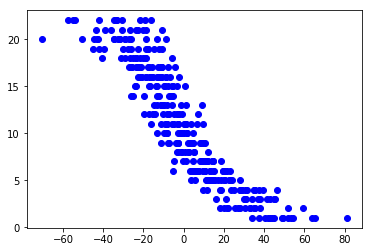

In [57]:
plt.scatter(X_reduced, y_test,  color='blue')

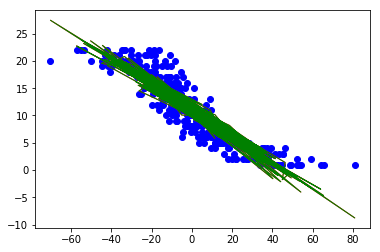

In [58]:
plt.scatter(X_reduced, y_test,  color='blue')
plt.plot(X_reduced, test_predicted, color='red',linewidth=1)
plt.plot(X_reduced, test_predicted, color='green',linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

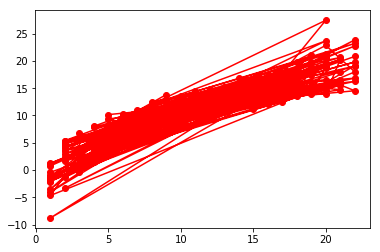

In [59]:
plt.plot(y_test, test_predicted, 'ro-')

In [60]:
np.std(np.abs(y_test-test_predicted))

1.5688959829197577

In [61]:
data4=pd.DataFrame({'actual':y_test,'pred':test_predicted})
data4.head()

,actual,pred
623,16,15.511500
813,9,11.204482
284,5,10.157461
125,6,6.637243
1038,14,14.514740


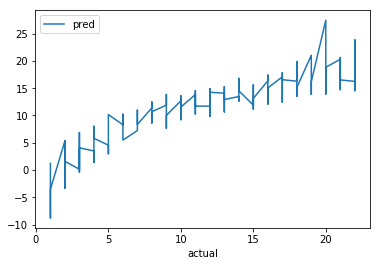

In [62]:
data4.sort_values('actual').plot(kind='line',x='actual',y='pred')

Text(0,0.5,'Residuals')

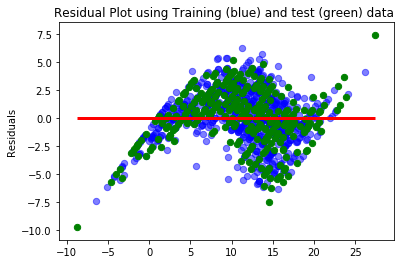

In [63]:
plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train,c='b',s=40,alpha=0.5)
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,c='g',s=40)
plt.hlines(y=0,xmin=np.min(reg.predict(X_test)),xmax=np.max(reg.predict(X_test)),color='red',linewidth=3)
plt.title('Residual Plot using Training (blue) and test (green) data ')
plt.ylabel('Residuals')

In [64]:
data.corr()

,pos,p,w,d,l,f,a,gd,points
pos,1.000000,8.136420e-02,-0.895618,0.109913,0.898185,-0.749478,0.776178,-9.007077e-01,-0.857841
p,0.081364,1.000000e+00,0.106702,0.291835,0.110881,0.174759,0.183441,1.369197e-17,-0.119334
w,-0.895618,1.067015e-01,1.000000,-0.292644,-0.825526,0.844658,-0.716922,9.241364e-01,0.885110
d,0.109913,2.918349e-01,-0.292644,1.000000,-0.167968,-0.164216,-0.005283,-9.629585e-02,-0.194447
l,0.898185,1.108814e-01,-0.825526,-0.167968,1.000000,-0.712709,0.820199,-9.038352e-01,-0.852586
f,-0.749478,1.747588e-01,0.844658,-0.164216,-0.712709,1.000000,-0.432999,8.544813e-01,0.752923
a,0.776178,1.834407e-01,-0.716922,-0.005283,0.820199,-0.432999,1.000000,-8.382476e-01,-0.731917
gd,-0.900708,1.369197e-17,0.924136,-0.096296,-0.903835,0.854481,-0.838248,1.000000e+00,0.877284
points,-0.857841,-1.193338e-01,0.885110,-0.194447,-0.852586,0.752923,-0.731917,8.772843e-01,1.000000


In [65]:
import seaborn as sns

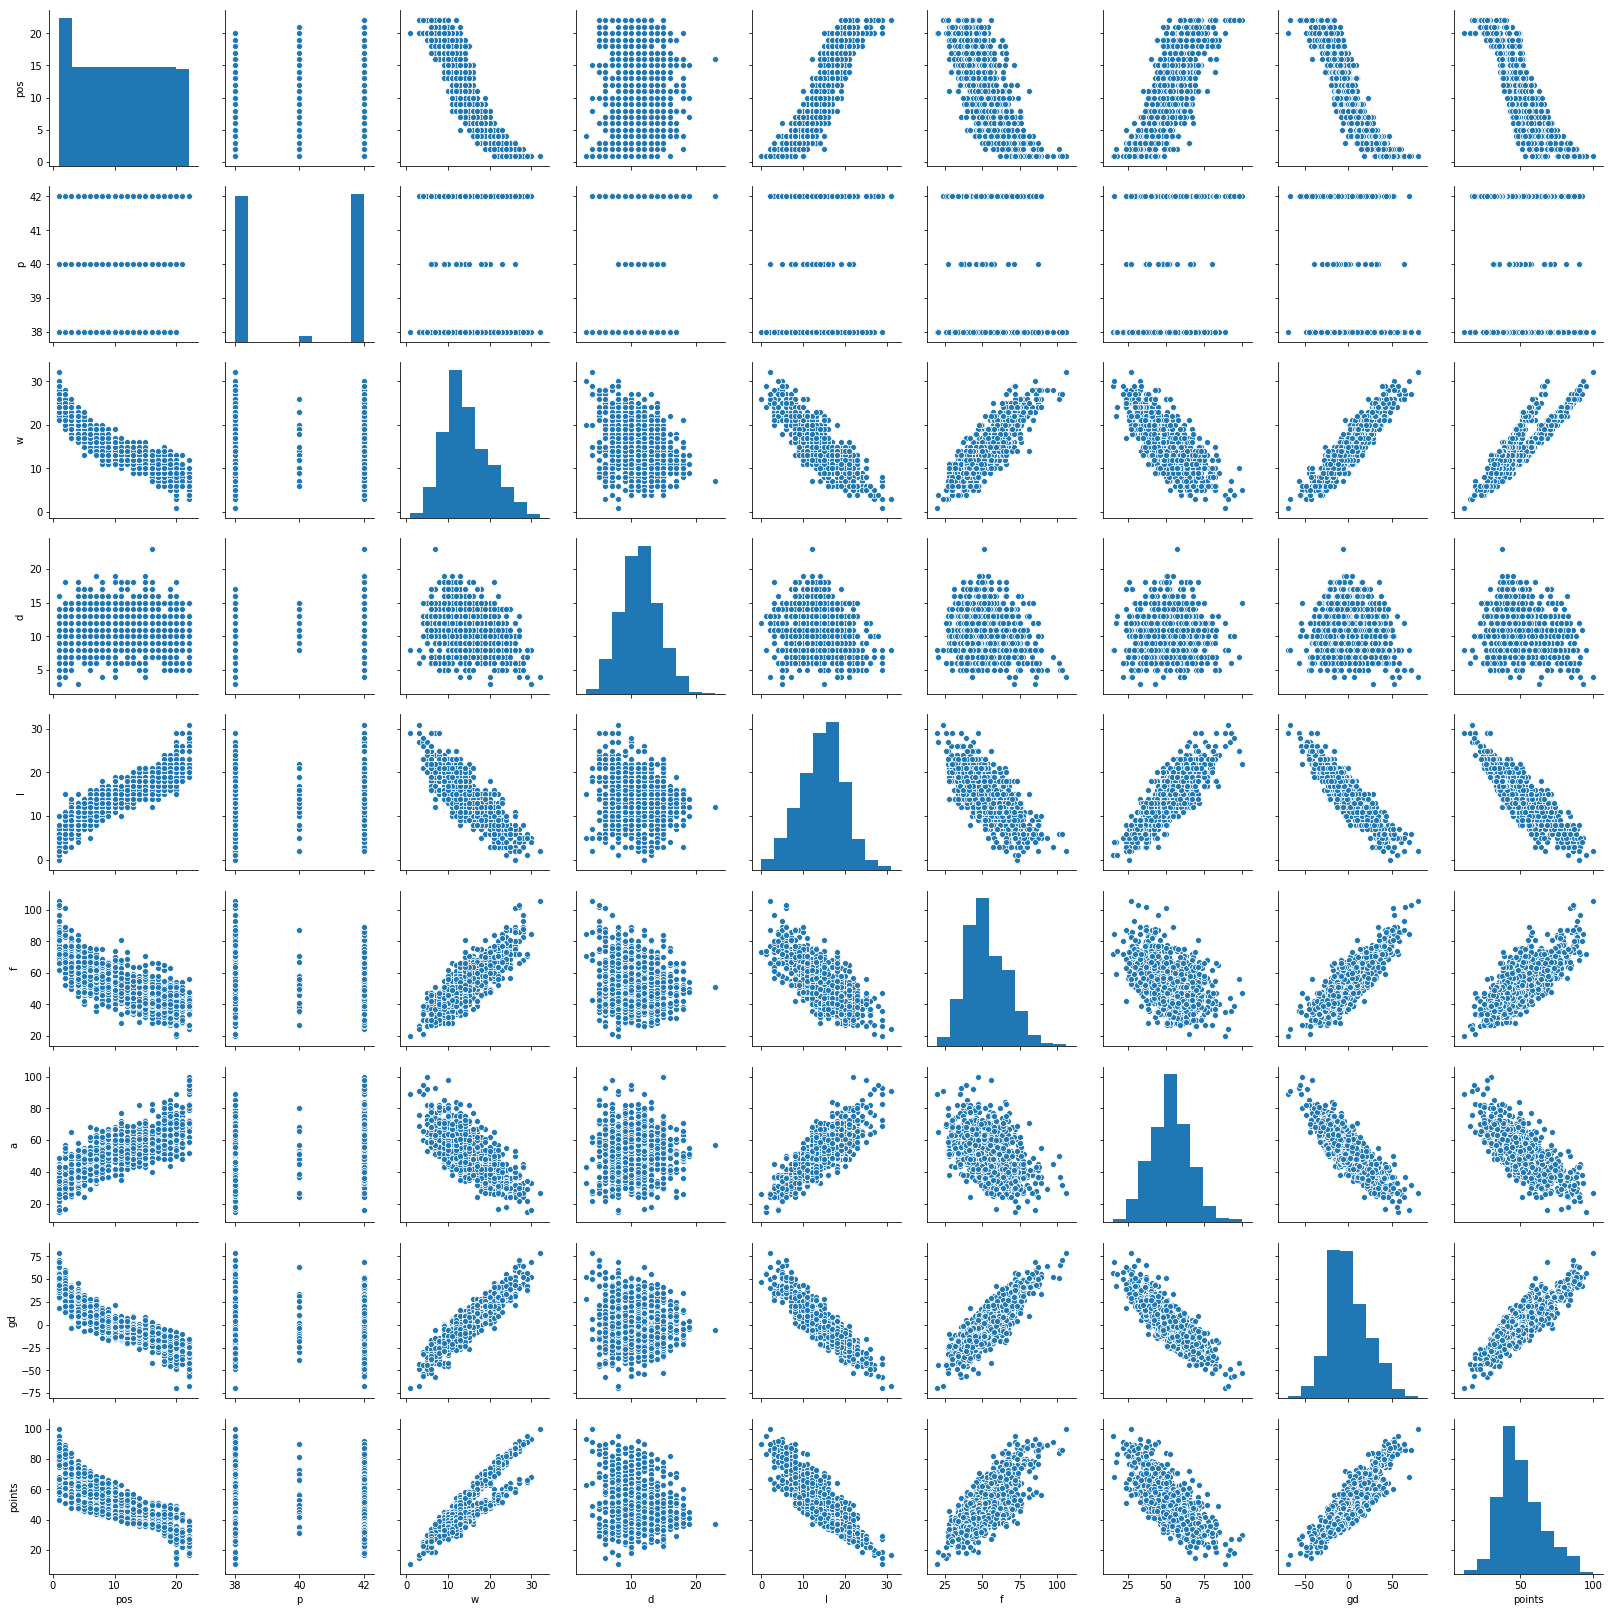

In [66]:
sns.pairplot(data)

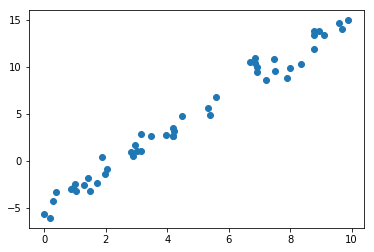

In [71]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

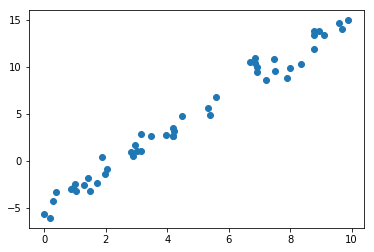

In [72]:
rng = np.random.RandomState(1)
x2 = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x2, y);